# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file  ="C:/Users/Reiners/Desktop/trafficsigns/train.p"
validation_file="C:/Users/Reiners//Desktop/trafficsigns/valid.p"
testing_file   ="C:/Users/Reiners/Desktop/trafficsigns/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("NO ERROR")

NO ERROR


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

[]

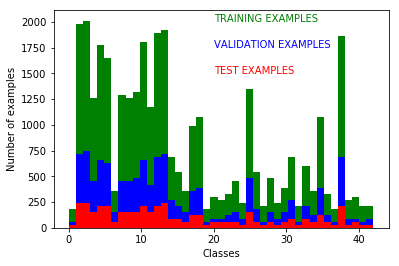

In [4]:
#Number of Exampleimages per class of the Datasets for training, test and validation
plt.hist(y_train, bins=n_classes, facecolor='g')
plt.hist(y_test, bins=n_classes, facecolor='b')
plt.hist(y_valid, bins=n_classes, facecolor='r')
plt.text(20,2000, 'TRAINING EXAMPLES', color='g')
plt.text(20,1750, 'VALIDATION EXAMPLES', color='b')
plt.text(20,1500, 'TEST EXAMPLES', color='r')
plt.xlabel('Classes')
plt.ylabel('Number of examples')
plt.plot()

10 Example Images from Training-Set


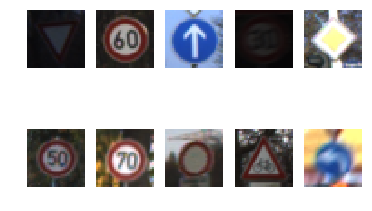

In [5]:
# 4 Random Exampleimages from Training set
from random import randint
print('10 Example Images from Training-Set')
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[randint(0,n_train)])
    plt.axis('off')

In [6]:
# Data Augmentation to fill the underrepresnted classes in the Training Set

## Many classes have significant more data representation than others, which may lead to a biased learning towards
## these classes. To prevent this learning bias, it is good to obtain more data for the underrepresented classes.
## As it is limited to the provided dataset, an augmentation of the given images is desirable.
## They are augmented in a way that they can be considered as new data and not only copies of themselves.
## Augmentation can be 1)flipping, 2)colour/contrast/brightness changes, 3)rotation, 4)or warping.
### 1) Not all classes can be flipped without destroying it's features, which requires much work to detect etc --> not implemented
### 2)+3) should not affect recognition anyway that hard --> not implemented
### 4) perspective warping, as if the sign was photographed from different angles
from numpy import random
def augment_perspective_right(image):
    rows, columns   = image.shape[:2]
    in_tl=[0+np.random.randint(1,7)         , 0+np.random.randint(1,7)]      #top left corner
    in_tr=[columns-1+np.random.randint(-2,3), 0+np.random.randint(-1,5)]     #top right corner
    in_br=[columns-1+np.random.randint(-2,3), rows-1+np.random.randint(-1,5)]#bottom right corner
    in_bl=[0+np.random.randint(1,7)         , rows-1-np.random.randint(1,7)] #bottom left corner
    
    out_tl=[0         , 0]    #top left corner
    out_tr=[columns-1, 0]     #top right corner
    out_br=[columns-1, rows-1]#bottom right corner
    out_bl=[0        , rows-1]#bottom left corner
    

    in_corners =np.float32([in_tl,in_bl,in_tr,in_br]) 
    out_corners=np.float32([out_tl,out_bl,out_tr,out_br])
    perspective=cv2.getPerspectiveTransform(in_corners,out_corners)
    
    image=cv2.warpPerspective(image,perspective,(columns,rows))
    return image
def augment_perspective_left(image):
    rows, columns   = image.shape[:2]
    in_tl=[0-np.random.randint(-2,3)       , 0-np.random.randint(-1,5)]     #top left corner
    in_tr=[columns-1-np.random.randint(1,7), 0-np.random.randint(1,7)]      #top right corner
    in_br=[columns-1-np.random.randint(1,7), rows-1-np.random.randint(1,7)] #bottom right corner
    in_bl=[0-np.random.randint(-2,3)       , rows-1+np.random.randint(-1,5)]#bottom left corner
    
    out_tl=[0         , 0]    #top left corner
    out_tr=[columns-1, 0]     #top right corner
    out_br=[columns-1, rows-1]#bottom right corner
    out_bl=[0        , rows-1]#bottom left corner

    in_corners =np.float32([in_tl,in_bl,in_tr,in_br]) 
    out_corners=np.float32([out_tl,out_bl,out_tr,out_br])
    perspective=cv2.getPerspectiveTransform(in_corners,out_corners)
    
    image=cv2.warpPerspective(image,perspective,(columns,rows))
    return image

In [7]:
# All classes that have less than 1000 examples, will get filled up with augmented/perspective warped images from that class
input_i=[]
output_i=[]
X_train_original=X_train
y_train_original=y_train
for class_n in range(n_classes):
    class_i = np.where(y_train == class_n)
    examples_n = len(class_i[0])
    print('class: ', class_n, ' out of 42')
    if examples_n < 1000:
        for i in range(np.int32((1002 - examples_n)/2)):                             #each image will get transformed twice 
            input_i.append(class_i[0][i%examples_n])
            output_i.append(X_train.shape[0])
            image_new = X_train[class_i[0][i%examples_n]]
            image_new = augment_perspective_right(image_new)          #augment prespective in right direction
            X_train = np.concatenate((X_train, [image_new]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            image_new = X_train[class_i[0][i%examples_n]]
            image_new = augment_perspective_left(image_new)           ##augment prespective in left direction
            X_train = np.concatenate((X_train, [image_new]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
    
print('Training Set filled up with augmented Images')
            
#save filled up training set            
train['features']=X_train
train['labels']=y_train
with open("C:/Users/Reiners/Desktop/trafficsigns/augment_fillup.p", mode='wb') as f:
    pickle.dump(train,f)

class:  0  out of 42
class:  1  out of 42
class:  2  out of 42
class:  3  out of 42
class:  4  out of 42
class:  5  out of 42
class:  6  out of 42
class:  7  out of 42
class:  8  out of 42
class:  9  out of 42
class:  10  out of 42
class:  11  out of 42
class:  12  out of 42
class:  13  out of 42
class:  14  out of 42
class:  15  out of 42
class:  16  out of 42
class:  17  out of 42
class:  18  out of 42
class:  19  out of 42
class:  20  out of 42
class:  21  out of 42
class:  22  out of 42
class:  23  out of 42
class:  24  out of 42
class:  25  out of 42
class:  26  out of 42
class:  27  out of 42
class:  28  out of 42
class:  29  out of 42
class:  30  out of 42
class:  31  out of 42
class:  32  out of 42
class:  33  out of 42
class:  34  out of 42
class:  35  out of 42
class:  36  out of 42
class:  37  out of 42
class:  38  out of 42
class:  39  out of 42
class:  40  out of 42
class:  41  out of 42
class:  42  out of 42
Training Set filled up with augmented Images


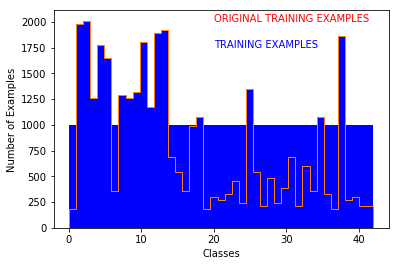

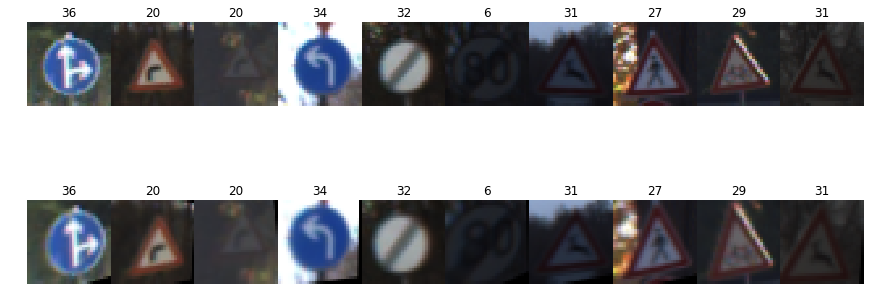

In [8]:
#Visualized comparision between original and filled-up training set

plt.hist(y_train         , bins=len(set(y_train)), facecolor='b')
plt.hist(y_train_original, bins=len(set(y_train)),facecolor='r',histtype='step')
plt.text(20,2000, 'ORIGINAL TRAINING EXAMPLES', color='r')
plt.text(20,1750, 'TRAINING EXAMPLES', color='b')
plt.xlabel('Classes')
plt.ylabel('Number of Examples')
plt.plot()
         
# show comparisons of 10 random augmented data points
choices = list(range(len(input_i)))
picks = []
for i in range(10):
    rnd_index = np.random.randint(low=0,high=len(choices))
    picks.append(choices.pop(rnd_index))
fig, axs = plt.subplots(2,10, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    image = X_train[input_i[picks[i]]].squeeze()
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[input_i[picks[i]]])
for i in range(10):
    image = X_train[output_i[picks[i]]].squeeze()
    axs[i+10].axis('off')
    axs[i+10].imshow(image)
    axs[i+10].set_title(y_train[output_i[picks[i]]])

In [9]:
#####################################################
## Starting from here, with filled up training set ##
#####################################################
import pickle
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import cv2
import tensorflow as tf

training_file  ="C:/Users/Reiners/Desktop/trafficsigns/augment_fillup.p"
validation_file="C:/Users/Reiners//Desktop/trafficsigns/valid.p"
testing_file   ="C:/Users/Reiners/Desktop/trafficsigns/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


#Save original Image Data
X_train_original=X_train
y_train_original=y_train
X_valid_original=X_valid
X_test_original =X_test

X_train_raw=X_train
X_valid_raw=X_valid
X_test_raw =X_test

print("NO ERROR")

NO ERROR


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Image Data: grayscaled


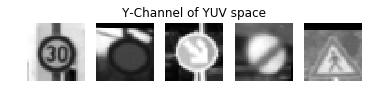

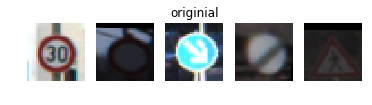

In [10]:
#Grayscale Image Data
##As traffic signs are designed to be recognizeable also for colourblind people,
##only the visualized symbols and the geometric form of the sign matter.
##Therefore the colour is not a necessary property to classify a traffic sign and we can use the grayscale of the image.
##This will reduce the complexity of imagefeatures the network will try to classify
##and may be more accurate in a shorter time/with less training data.

##following mentors suggestion, grayscaling was done using the Y channel of the YUV space
X_train=[]
for i in range(len(X_train_raw)):
    X_train.append(cv2.cvtColor(X_train_raw[i],cv2.COLOR_BGR2YUV))
X_valid=[]
for i in range(len(X_valid_raw)):
    X_valid.append(cv2.cvtColor(X_valid_raw[i],cv2.COLOR_BGR2YUV))
X_test=[]
for i in range(len(X_test_raw)):
    X_test.append(cv2.cvtColor(X_test_raw[i],cv2.COLOR_BGR2YUV))
    
X_train_Y=[]
for i in range(len(X_train)):
    Y=[]
    U=[]
    V=[]
    Y, U, V=cv2.split(X_train[i])
    X_train_Y.append(Y)
    print(len(X_train_Y), end='\r', flush=True)
X_train=[]
X_train=X_train_Y

X_valid_Y=[]
for i in range(len(X_valid)):
    Y=[]
    U=[]
    V=[]
    Y, U, V=cv2.split(X_valid[i])
    X_valid_Y.append(Y)
    print(len(X_valid_Y), end='\r', flush=True)
X_valid=[]
X_valid=X_valid_Y

X_test_Y=[]
for i in range(len(X_test)):
    Y=[]
    U=[]
    V=[]
    Y, U, V=cv2.split(X_test[i])
    X_test_Y.append(Y)
    print(len(X_test_Y), end='\r', flush=True)
X_test=[]
X_test=X_test_Y
    
################ PRINT ###################################
print("Image Data: grayscaled")
example=[]
for i in range(5):
    example.append(np.random.randint(0,len(X_train)))
    plt.figure(0)
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[example[i]], cmap='gray')
    plt.axis('off')
    if i==2:
        plt.title('Y-Channel of YUV space')
for i in range(5):
    plt.figure(1)
    plt.subplot(1,5,i+1)
    plt.imshow(X_train_raw[example[i]])
    plt.axis('off')
    if i==2:
        plt.title('originial')

Image Data: normalized + grayscaled


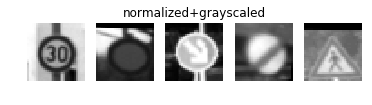

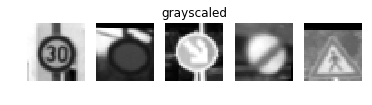

In [11]:
#Normalize Image Data
## according to cv2 Documentation
## normalized to the min and max values of the specific grayscale images

#X_train_n=np.asarray(X_train)
#X_train_n =cv2.normalize(np.asarray(X_train),X_train_n,np.amin(X_train),np.amax(X_train),cv2.NORM_MINMAX,-1)

#X_valid_n=np.asarray(X_valid)
#X_valid_n =cv2.normalize(np.asarray(X_valid),X_valid_n,np.amin(X_valid),np.amax(X_valid),cv2.NORM_MINMAX,-1)

#X_test_n=np.asarray(X_test)
#X_test_n  =cv2.normalize(np.asarray(X_test),X_test_n,np.amin(X_test),np.amax(X_test),cv2.NORM_MINMAX,-1)
X_train_n = (np.asarray(X_train)/122.5)-1
X_valid_n = (np.asarray(X_valid)/122.5)-1
X_test_n = (np.asarray(X_test)/122.5)-1
################ PRINT ###################################
print("Image Data: normalized + grayscaled")
for i in range(5):
    plt.figure(1)
    plt.subplot(1,5,i+1)
    plt.imshow(X_train_n[example[i]], cmap='gray')
    plt.axis('off')
    if i==2:
        plt.title('normalized+grayscaled')
for i in range(5):
    plt.figure(2)
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[example[i]], cmap='gray')
    plt.axis('off')
    if i==2:
        plt.title('grayscaled')
        
X_train=X_train_n
X_valid=X_valid_n
X_test=X_test_n

In [12]:
#Reshape Input Data, as cv2.grayscale outputs WxH and we need WxHxC
X_reshape=[]
for i in range(len(X_train)):
    X_reshape.append(np.reshape(X_train[i], (32,32,1)))
X_train=X_reshape
X_reshape=[]
for i in range(len(X_valid)):
    X_reshape.append(np.reshape(X_valid[i], (32,32,1)))
X_valid=X_reshape
X_reshape=[]
for i in range(len(X_test)):
    X_reshape.append(np.reshape(X_test[i], (32,32,1)))
X_test=X_reshape

In [13]:
#Canny Edge Detection
##As stated above, traffic signs are designed also for blind people, therefore the design is high contrast with simple forms
##This can be used in our advantage with Canny Edge Detection. Colour and background are of no interest, but only the form
##of the shown symbols/signs

###This is only for test, if results are not satisfying, this cell will be ignored

#high_threshold=15
#low_threshold =5
#print(X_train[1])
#X_train_edges=cv2.Canny(np.asarray(X_train), low_threshold, high_threshold)
#X_valid_edges=cv2.Canny(np.asarray(X_valid), low_threshold, high_threshold)
#X_test_edges =cv2.Canny(np.asarray(X_test) , low_threshold, high_threshold)

#vertices = X_train_raw*0
#X_train_edges = X_train_raw(X_train_edges, vertices)
################ PRINT ###################################
#print("Image Data: normalized + grayscaled + CannyEdges")
#example=[]
#for i in range(5):
#    example.append(randint(0,n_train))
#    plt.figure(1)
#    plt.subplot(1,5,i+1)
#    plt.imshow(X_train_edges[example[i]], cmap='Greys_r')
#    plt.axis('off')
#    if i==2:
#        plt.title('normalized+grayscaled+CannyEdges')
#for i in range(5):
#    plt.figure(2)
#    plt.subplot(1,5,i+1)
#    plt.imshow(X_train[example[i]])
#    plt.axis('off')
#    if i==2:
#        plt.title('normalized+grayscaled')

### Model Architecture

In [14]:
#leNet architecture imported from Udacity's leNet-lab:
##https://github.com/udacity/CarND-LeNet-Lab/blob/master/LeNet-Lab-Solution.ipynb

## but Weight initialization was changed from Truncated_Normal:
#### W = tf.Variable(tf.truncated_normal(shape=(), mean = mu, stddev = sigma))
## to Xavier_Initilaizer:
#### W = tf.get_variable("W", shape=[],initializer=tf.contrib.layers.xavier_initializer())
## according to:
    ##Convolutional Networks for Traffic Sign Classification
    ##(Master’s thesis in Communication Engineering, by FEDERICO ZANETTI, 2016)
    ## http://publications.lib.chalmers.se/records/fulltext/245747/245747.pdf
    ## "[...] if the weights in a network start too small, then the signal shrinks as it passes through each layer
    ##   until it is too tiny to be useful.  If the weights in a network are too large when training begins,
    ##   then the signal grows as it passes through each layer until it is too massive to be useful.
    ##   Xavier initialization keeps the signal in a reasonable range of values through many layers."
import tensorflow as tf    
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    ###same Input dimensions are fullfilled as the Trafficsign Images were grayscaled (WxHx1)
    #conv1_W = tf.get_variable("conv1_W", shape=[5, 5, 1, 6],initializer=
    #                          tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = 0, stddev = 0.1))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    #conv2_W = tf.get_variable("conv2_W", shape=[5, 5, 6, 16],initializer=
    #                          tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = 0, stddev = 0.1))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    #fc1_W = tf.get_variable("fc1_W", shape=[400, 120],initializer=
    #                          tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = 0, stddev = 0.1))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    #fc2_W  = tf.get_variable("fc2_W", shape=[120, 84],initializer=
    #                          tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = 0, stddev = 0.1))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    #fc3_W  = tf.get_variable("fc3_W", shape=[84, 43],initializer=
    #                          tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = 0, stddev = 0.1))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

print("NO ERROR")

NO ERROR


In [15]:
#leNet architecture imported from Udacity's leNet-lab:
##https://github.com/udacity/CarND-LeNet-Lab/blob/master/LeNet-Lab-Solution.ipynb

## but Weight initialization was changed from Truncated_Normal:
#### W = tf.Variable(tf.truncated_normal(shape=(), mean = mu, stddev = sigma))
## to Xavier_Initilaizer:
#### W = tf.get_variable("W", shape=[],initializer=tf.contrib.layers.xavier_initializer())
## according to:
    ##Convolutional Networks for Traffic Sign Classification
    ##(Master’s thesis in Communication Engineering, by FEDERICO ZANETTI, 2016)
    ## http://publications.lib.chalmers.se/records/fulltext/245747/245747.pdf
    ## "[...] if the weights in a network start too small, then the signal shrinks as it passes through each layer
    ##   until it is too tiny to be useful.  If the weights in a network are too large when training begins,
    ##   then the signal grows as it passes through each layer until it is too massive to be useful.
    ##   Xavier initialization keeps the signal in a reasonable range of values through many layers."
    
    
## and with dropout implemented. Weak dropout after convolutional layer, stronger right before fully connected layers
import tensorflow as tf    
from tensorflow.contrib.layers import flatten

def LeNet1(x):

    # SOLUTION: Layer 1: Convolutional. Input = 31x31x1. Output = 28x28x6.
    conv1_W = tf.get_variable("conv1_W", shape=[5, 5, 1, 6],initializer=
                              tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
    #conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = 0, stddev = 0.1))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Dropout
    conv1 = tf.nn.dropout(conv1, keep_prob_layer1)
    #16
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.get_variable("conv2_W", shape=[5, 5, 6, 16],initializer=
                              tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
    #conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = 0, stddev = 0.1))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Dropout
    conv2 = tf.nn.dropout(conv2, keep_prob_layer2)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.get_variable("fc1_W", shape=[400, 120],initializer=
                              tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
    #fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = 0, stddev = 0.1))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob_layer3)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.get_variable("fc2_W", shape=[120, 84],initializer=
                              tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
    #fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = 0, stddev = 0.1))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob_layer4)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.get_variable("fc3_W", shape=[84, 43],initializer=
                              tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
    #fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = 0, stddev = 0.1))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

print("NO ERROR")

NO ERROR


In [16]:
#leNet architecture imported from Udacity's leNet-lab:
##https://github.com/udacity/CarND-LeNet-Lab/blob/master/LeNet-Lab-Solution.ipynb

## but Weight initialization was changed from Truncated_Normal:
#### W = tf.Variable(tf.truncated_normal(shape=(), mean = mu, stddev = sigma))
## to Xavier_Initilaizer:
#### W = tf.get_variable("W", shape=[],initializer=tf.contrib.layers.xavier_initializer())
## according to:
    ##Convolutional Networks for Traffic Sign Classification
    ##(Master’s thesis in Communication Engineering, by FEDERICO ZANETTI, 2016)
    ## http://publications.lib.chalmers.se/records/fulltext/245747/245747.pdf
    ## "[...] if the weights in a network start too small, then the signal shrinks as it passes through each layer
    ##   until it is too tiny to be useful.  If the weights in a network are too large when training begins,
    ##   then the signal grows as it passes through each layer until it is too massive to be useful.
    ##   Xavier initialization keeps the signal in a reasonable range of values through many layers."
    
    
## and with dropout implemented. Weak dropout after convolutional layer, stronger right before fully connected layers
import tensorflow as tf    
from tensorflow.contrib.layers import flatten

def LeNet2(x):
    #Layer 00: Convolutional. Input = 32x32x1. Output = 32x32x4.
    conv00_W = tf.get_variable("conv00_W", shape=[1, 1, 1, 4],initializer=
                              tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
    #conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = 0, stddev = 0.1))
    conv00_b = tf.Variable(tf.zeros(4))
    conv00   = tf.nn.conv2d(x, conv00_W, strides=[1, 1, 1, 1], padding='VALID') + conv00_b

    # SOLUTION: Activation.
    conv00 = tf.nn.relu(conv00)
    # Dropout
    conv00 = tf.nn.dropout(conv00, keep_prob_layer00)
    
    #Layer 0: Convolutional. Input = 32x32x4. Output = 31x31x5.
    conv0_W = tf.get_variable("conv0_W", shape=[2, 2, 4, 5],initializer=
                              tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
    #conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = 0, stddev = 0.1))
    conv0_b = tf.Variable(tf.zeros(5))
    conv0   = tf.nn.conv2d(conv00, conv0_W, strides=[1, 1, 1, 1], padding='VALID') + conv0_b

    # SOLUTION: Activation.
    conv0 = tf.nn.relu(conv0)
    # Dropout
    conv0 = tf.nn.dropout(conv0, keep_prob_layer0)
    
    # SOLUTION: Layer 1: Convolutional. Input = 31x31x5. Output = 28x28x6.
    conv1_W = tf.get_variable("conv1_W", shape=[4, 4, 5, 6],initializer=
                              tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
    #conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = 0, stddev = 0.1))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Dropout
    conv1 = tf.nn.dropout(conv1, keep_prob_layer1)
    #16
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.get_variable("conv2_W", shape=[5, 5, 6, 16],initializer=
                              tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
    #conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = 0, stddev = 0.1))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Dropout
    conv2 = tf.nn.dropout(conv2, keep_prob_layer2)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.get_variable("fc1_W", shape=[400, 120],initializer=
                              tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
    #fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = 0, stddev = 0.1))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob_layer3)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.get_variable("fc2_W", shape=[120, 84],initializer=
                              tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
    #fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = 0, stddev = 0.1))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob_layer4)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.get_variable("fc3_W", shape=[84, 43],initializer=
                              tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
    #fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = 0, stddev = 0.1))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

print("NO ERROR")

NO ERROR


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

## Tuning Parameters
EPOCHS     = 100       #Number of Training Iterations
BATCH_SIZE = 50  #Number of Images send through Neuralnetwork at once
rate       = 0.0008     #Learning Rate

keep_prob_layer00=1 #probability to keep neurons
keep_prob_layer0 =1
keep_prob_layer1 =0.998 
keep_prob_layer2 =0.995 
keep_prob_layer3 =0.85 
keep_prob_layer4 =0.55 



#leNet operations imported from Udacity's leNet-lab:
##https://github.com/udacity/CarND-LeNet-Lab/blob/master/LeNet-Lab-Solution.ipynb
from sklearn.utils import shuffle

tf.reset_default_graph() 
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)


#########################
## CHANGE ARCHITECTURE ##
#########################
logits = LeNet2(x)      #
#########################

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1),"Validation Accuracy = {:.3f}".format(validation_accuracy), end='\r', flush=True)
        
    saver.save(sess, '.\lenet' )
    print("Model saved")

Training...

Model saved.. Validation Accuracy = 0.962


In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.944


I have played with the settings to the LeNet architecture provided in the Udacity Lab. Also I have changed the initilializer.
But the initializer had no real impact on the accuracy, maybe it is only significant trying to stretch out within a 99% accuracy, but I didn't manage to get there, not even close.

So the settings below were done either with truncated_normal or xavier intitializier. The last few settings featured always xavier.

LeNet is the original from the lab.
LeNet1 is with added dropouts between the layers
LeNet2 is added with up to two additional layers together with dropouts before LeNet1

Settings will be [Epoch,BatchSize,learningrate // keepingprobabilities(first to last layer)]

Approach:

- A1) LeNet, different settings, all with a maximum validation accuracy of 93%, more often 88%-92%
- A2) LeNet1 [120,60,0.00085 // 0.96,0.93,0.75,0.5] Validation Accuracy = 0.944
- A3) LeNet1 [120,60,0.00065 // 0.98,0.98,0.8,0.7] Validation Accuracy = 0.948
- A4) LeNet1 [120,60,0.00065 // 0.98,0.98,0.8,0.7] Validation Accuracy = 0.935 (switched from BGR2GRAY to BGR2YUV)
- A5) LeNet2 [120,60,0.00065 // 1,0.98,0.98,0.8,0.7] Validation Accuracy = 0.955 (1 layer before LeNet1, filter [1x1x1x4])
- A6) LeNet2 [70,200,0.00065 // 1,0.98,0.98,0.8,0.7] Validation Accuracy = 0.92
- A7) LeNet2 [50,60,0.00085 // 1,0.98,0.98,0.8,0.7] Validation Accuracy = 0.94
- A8) LeNet2 [30,100,0.00075 // 1,0.98,0.98,0.8,0.7] Validation Accuracy = 0.93
- A9) LeNet2 [70,100,0.00075 // 0.8,0.9,0.95,0.95,0.7,0.6] Validation Accuracy = 0.858 (2 layers before LeNet1,both [1x1x1x4])
- A10)LeNet2 [100,1000,0.00055 // 0.99,0.99,0.95,0.95,0.7,0.6] Validation Accuracy = 0.88
- A11)LeNet2 [100,1000,0.00055 // 0.99,0.99,0.95,0.95,0.7,0.6] Accuracy = 0.91 (conv00 [1x1x1x4],conv0[2x2x4x5],con1[4x4x5x6])
- A12)LeNet2 [100,300,0.00055 // 0.99,0.99,0.95,0.95,0.7,0.6] Validation Accuracy = 0.924
- A13)LeNet2 [100,300,0.00075 // 0.99,0.99,0.95,0.95,0.7,0.6] Validation Accuracy = 0.935
- A14)LeNet2 [100,300,0.0009 // 0.99,0.99,0.95,0.95,0.7,0.6] Validation Accuracy = 0.945
- A15)LeNet2 [100,300,0.001 // 0.99,0.99,0.95,0.95,0.7,0.6] Validation Accuracy = 0.933
- A16)LeNet2 [100,50,0.001 // 0.99,0.99,0.95,0.95,0.7,0.6] Validation Accuracy = 0.954
- A17)LeNet2 [30,50,0.00093 // 0.99,0.99,0.99,0.99,0.8,0.7] Validation Accuracy = 0.91
- A18)LeNet2 [30,50,0.00093 // 0.99,0.99,0.99,0.95,0.5,0.5] Validation Accuracy = 0.92
- A19)LeNet2 [100,50,0.00093 // 1,1,0.998,0.995,0.85,0.55] Validation Accuracy = 0.965  // Test Accuracy =0.946
- A20)LeNet2 [100,50,0.0008 // 1,1,0.998,0.995,0.85,0.55] Validation Accuracy = 0.962  // Test Accuracy =0.944

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

done


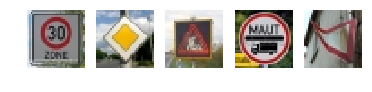

In [32]:
### Load the images and plot them here.
### like the train set, I already masked the region of interest and rescaled to 32x32
import pickle
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import cv2
import tensorflow as tf

X_own=[]
own=cv2.imread("C:/Users/Reiners/Desktop/trafficsigns/foundsigns/Clipboard01.png") #30 limit
X_own.append(cv2.cvtColor(own,cv2.COLOR_BGR2RGB))
own=np.array(cv2.imread("C:/Users/Reiners/Desktop/trafficsigns/foundsigns/Clipboard02.png")) #"Vorfahrtsstraße"
X_own.append(cv2.cvtColor(own,cv2.COLOR_BGR2RGB))
own=np.array(cv2.imread("C:/Users/Reiners/Desktop/trafficsigns/foundsigns/Clipboard03.png")) #roadwork, but as LED-sign
X_own.append(cv2.cvtColor(own,cv2.COLOR_BGR2RGB))
own=np.array(cv2.imread("C:/Users/Reiners/Desktop/trafficsigns/foundsigns/Clipboard04.png")) #truck sign, with "maut" warning in it
X_own.append(cv2.cvtColor(own,cv2.COLOR_BGR2RGB))
own=np.array(cv2.imread("C:/Users/Reiners/Desktop/trafficsigns/foundsigns/Clipboard05.png")) #damaged yield
X_own.append(cv2.cvtColor(own,cv2.COLOR_BGR2RGB))

y_own=[1,12,25,16,13]

X_own_original=X_own

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_own[i])
    plt.axis('off')
print('done')

Own Image Data: normalized + grayscaled


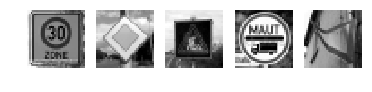

In [33]:
#Preprocess the images like the training set

#grayscale via Y-channel of YUV-space
X_yuv=[]
for i in range(len(X_own)):
    X_yuv.append(cv2.cvtColor(X_own[i],cv2.COLOR_BGR2YUV))
    
X_y=[]
for i in range(len(X_yuv)):
    Y=[]
    U=[]
    V=[]
    Y, U, V=cv2.split(X_yuv[i])
    X_y.append(Y)
    
X_own=[]
X_own=X_y

#normalize
X_own = (np.asarray(X_own)/122.5)-1

################ PRINT ###################################
print("Own Image Data: normalized + grayscaled")
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_own[i], cmap='gray')
    plt.axis('off')
##########################################################

#reshape
X_y=[]
for i in range(len(X_own)):
    X_y.append(np.reshape(X_own[i], (32,32,1)))
X_own=X_y


### Predict the Sign Type for Each Image

In [59]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_own, y_own)
    print("Own Image Accuracy = {:.3f}".format(test_accuracy))

Own Image Accuracy = 0.400


### Analyze Performance

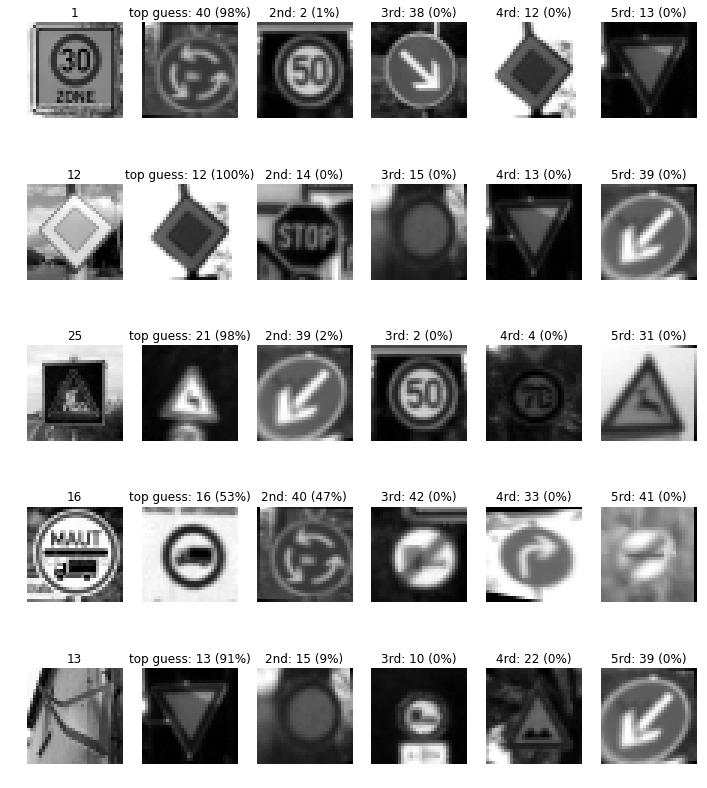

In [55]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
#code based on: https://github.com/jeremy-shannon/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

## and softmax task
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: X_own})
    my_top_k = sess.run(top_k, feed_dict={x: X_own})

    
    fig, axs = plt.subplots(len(X_own),6, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(X_own):
        axs[6*i].axis('off')
        axs[6*i].imshow(np.squeeze(image, axis=(2,)), cmap='gray')
        axs[6*i].set_title(y_own[i])
        guess1 = my_top_k[1][i][0]
        index1 = np.squeeze(np.int32(np.argwhere(y_train == guess1)[0]), )
        axs[6*i+1].axis('off')
        axs[6*i+1].imshow(np.squeeze(X_train[index1], axis=(2,)), cmap='gray')
        axs[6*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.squeeze(np.int32(np.argwhere(y_train == guess2)[0]), )
        axs[6*i+2].axis('off')
        axs[6*i+2].imshow(np.squeeze(X_train[index2], axis=(2,)), cmap='gray')
        axs[6*i+2].set_title('2nd: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.squeeze(np.int32(np.argwhere(y_train == guess3)[0]), )
        axs[6*i+3].axis('off')
        axs[6*i+3].imshow(np.squeeze(X_train[index3], axis=(2,)), cmap='gray')
        axs[6*i+3].set_title('3rd: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))
        guess4 = my_top_k[1][i][3]
        index4 = np.squeeze(np.int32(np.argwhere(y_train == guess4)[0]), )
        axs[6*i+4].axis('off')
        axs[6*i+4].imshow(np.squeeze(X_train[index4], axis=(2,)), cmap='gray')
        axs[6*i+4].set_title('4rd: {} ({:.0f}%)'.format(guess4, 100*my_top_k[0][i][2]))
        guess5 = my_top_k[1][i][4]
        index5 = np.squeeze(np.int32(np.argwhere(y_train == guess5)[0]), )
        axs[6*i+5].axis('off')
        axs[6*i+5].imshow(np.squeeze(X_train[index5], axis=(2,)), cmap='gray')
        axs[6*i+5].set_title('5rd: {} ({:.0f}%)'.format(guess5, 100*my_top_k[0][i][2]))



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [56]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
#code based on: https://github.com/jeremy-shannon/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb





### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")